In [5]:
# Load Pandas liabrary
import pandas as pd
import matplotlib.pyplot as plt
import math
import lifelines
import pandas_ml 
import numpy as np
import io


# Reading data from the original Obituaries_Dataset.csv

data = pd.read_csv("Obituaries_Dataset.csv")

# Remove NaN values from the deaths column, this will allow for accuracy when getting duration from Death to Announcement
data1 = data[pd.notnull(data['Death'])]

# Replacing all the "/" with "-" for dates to be able to be deducted.
data['Announcement'] = data['Announcement'].str.replace('/','-')
data['Death'] = data['Death'].str.replace('/','-')
data['Burial'] = data['Burial'].str.replace('/','-')

# Saving the dataset I need to CSV
data1.to_csv('Obituaries_clean_data_v2.csv', encoding='utf-8', index=False)

# Preview the first 5 lines of loaded data
data1

,Name,Announcement,Death,Burial,Burial_Day,Burial_Week,Gender,Age,Color,Size,...,Morgue,Same_Morgue,Cost_Morgue,Occupation,Repetition,Corporate,Corporate_Name,Residence,Residence_Name,Residence_Category
0,Eng. Paul Chemweno,11/8/2017,11/2/2017,11/17/2017,Friday,Weekday,Male,66.0,Yes,55.18,...,MTRH Eldoret,No,NaN,Director,NaN,NaN,NaN,NaN,NaN,NaN
1,Edith Kiende Kiogora,11/8/2017,10/27/2017,11/11/2017,Saturday,Weekend,Female,43.0,Yes,83.60,...,Chogoria Hospital Mortuary,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
2,Simon Muchiri Ngigii Mbaria,11/8/2017,11/1/2017,11/8/2017,Wednesday,Weekday,Male,35.0,Yes,109.12,...,Umash Nakuru,No,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
3,Mwalimu Erick Namusasi Werunga,11/8/2017,10/24/2017,11/9/2017,Thursday,Weekday,Male,54.0,Yes,83.60,...,Maida Mortuary,NaN,NaN,Teacher,NaN,NaN,NaN,NaN,NaN,NaN
4,Catherine Mueni Sina,11/8/2017,11/2/2017,11/11/2017,Saturday,Weekend,Female,41.0,No,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Maritha Mwendwa Mbui (Kaka),11/8/2017,11/2/2017,11/9/2017,Thursday,Weekday,Female,92.0,Yes,55.18,...,Meru Funeral Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Mama Fransisca Nyarinda Mose,11/7/2017,10/18/2017,11/10/2017,Friday,Weekday,Female,79.0,Yes,145.96,...,Umash Nairobi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Onesmus Mwangi Gachahi,11/7/2017,11/2/2017,11/9/2017,Thursday,Weekday,Male,86.0,Yes,55.18,...,Kenyatta University,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,WO1 (RTD) Jackson Gitonga Kirimania,11/7/2017,11/3/2017,11/11/2017,Saturday,Weekend,Male,72.0,Yes,55.18,...,St. Francis Funeral Home Kasarani,Yes,NaN,Soldier,NaN,NaN,NaN,NaN,NaN,NaN
9,Mama Lenah Nekesa Mamati,11/7/2017,11/2/2017,11/11/2017,Saturday,Weekend,Female,87.0,Yes,84.55,...,St. Francis Funeral Home Kasarani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Fetching the new data files 

obituaries = pd.read_csv("Obituaries_clean_data_v2.csv", 
                         parse_dates=["Announcement","Death","Burial"], 
                         dayfirst=True)

# Converting the dates to datetime, this is because we cannot deduct the string values

obituaries["Announcement"] = pd.to_datetime(obituaries['Announcement'], errors='coerce')
obituaries["Death"] = pd.to_datetime(obituaries['Death'], errors='coerce')
obituaries["Burial"] = pd.to_datetime(obituaries['Burial'], errors='coerce')

obituaries["Announcement_Date"]  = obituaries["Announcement"].dt.date
obituaries["Death_Date"]  = obituaries["Death"].dt.date
obituaries["Burial_Date"]  = obituaries["Burial"].dt.date


# Get the number of days to Annoucement of a death.
obituaries["duration"] = obituaries["Announcement_Date"] - obituaries["Death_Date"]

df4 = obituaries[pd.notnull(obituaries['duration'])]

df4.to_csv('Obituaries_clean_data_v3.csv', encoding='utf-8', index=False)

df4

,Name,Announcement,Death,Burial,Burial_Day,Burial_Week,Gender,Age,Color,Size,...,Repetition,Corporate,Corporate_Name,Residence,Residence_Name,Residence_Category,Announcement_Date,Death_Date,Burial_Date,duration
0,Eng. Paul Chemweno,2017-11-08,2017-11-02,2017-11-17,Friday,Weekday,Male,66.0,Yes,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,2017-11-02,2017-11-17,6 days
1,Edith Kiende Kiogora,2017-11-08,2017-10-27,2017-11-11,Saturday,Weekend,Female,43.0,Yes,83.60,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,2017-10-27,2017-11-11,12 days
2,Simon Muchiri Ngigii Mbaria,2017-11-08,2017-11-01,2017-08-11,Wednesday,Weekday,Male,35.0,Yes,109.12,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,2017-11-01,2017-08-11,7 days
3,Mwalimu Erick Namusasi Werunga,2017-11-08,2017-10-24,2017-09-11,Thursday,Weekday,Male,54.0,Yes,83.60,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,2017-10-24,2017-09-11,15 days
4,Catherine Mueni Sina,2017-11-08,2017-11-02,2017-11-11,Saturday,Weekend,Female,41.0,No,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,2017-11-02,2017-11-11,6 days
5,Maritha Mwendwa Mbui (Kaka),2017-11-08,2017-11-02,2017-09-11,Thursday,Weekday,Female,92.0,Yes,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-08,2017-11-02,2017-09-11,6 days
6,Mama Fransisca Nyarinda Mose,2017-11-07,2017-10-18,2017-10-11,Friday,Weekday,Female,79.0,Yes,145.96,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-07,2017-10-18,2017-10-11,20 days
7,Onesmus Mwangi Gachahi,2017-11-07,2017-11-02,2017-09-11,Thursday,Weekday,Male,86.0,Yes,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-07,2017-11-02,2017-09-11,5 days
8,WO1 (RTD) Jackson Gitonga Kirimania,2017-11-07,2017-11-03,2017-11-11,Saturday,Weekend,Male,72.0,Yes,55.18,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-07,2017-11-03,2017-11-11,4 days
9,Mama Lenah Nekesa Mamati,2017-11-07,2017-11-02,2017-11-11,Saturday,Weekend,Female,87.0,Yes,84.55,...,NaN,NaN,NaN,NaN,NaN,NaN,2017-11-07,2017-11-02,2017-11-11,5 days


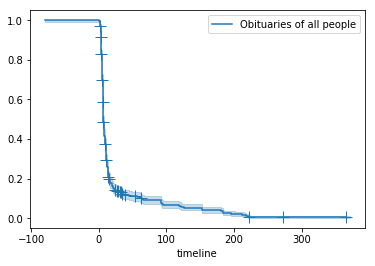

In [93]:

obituariesV1 = pd.read_csv("Obituaries_clean_data_v4.csv", 
                         parse_dates=["Announcement","Death","Burial"], 
                         dayfirst=True)

obituariesV1 = obituariesV1[pd.notnull(obituariesV1['duration'])]

obituariesV1 = obituariesV1[pd.notnull(obituariesV1['Burial_Date'])]

# Creation of a Kaplan-meier survival curve using gender variable
from lifelines import KaplanMeierFitter

# Duration of death to announcement in days
T = obituariesV1["duration"]


# Observation of death in boolean
# True for observed event (death);
# else False (this includes death not observed; death by other causes)

C = obituariesV1["Burial_Date"]

fitter = KaplanMeierFitter()
fitter.fit(T, event_observed=C, label="Obituaries of all people")
fitter.plot(show_censors=True)


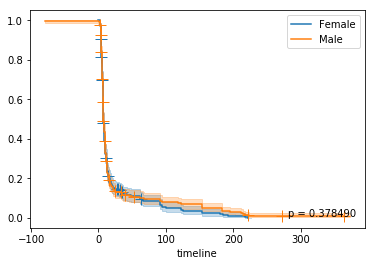

In [110]:
# We shall plot  Kaplan-meier survival curve using the gender variable in the X axis and Age on the Y axis

# Count all the male and female in the total dataset to also ensure that each record has a value.
# This will ease plotting survival curve

import matplotlib.pyplot as plt
from lifelines.statistics import logrank_test
from matplotlib.offsetbox import AnchoredText

obituariesV2 = obituariesV1.replace({'Gender': {'Male': 0, 'Female': 1}})

# we pick one trait, gender in this case Male
trait = "Gender" 

label = obituariesV2[trait].unique()
label = label[~np.array(label)]

fig, ax = plt.subplots(1)
# Separately for each class
# get index of patients from class
f = obituariesV2[obituariesV2[trait] == 1].index.tolist()
# fit the KaplarMayer with the subset of data from the respective class
fitter.fit([T[i] for i in f], event_observed=[C[i] for i in f], label="Female")
fitter.plot(ax=ax, show_censors=True)


# get index of patients from class
m = obituariesV2[obituariesV2[trait] == 0].index.tolist()
# fit the KaplarMayer with the subset of data from the respective class
fitter.fit([T[i] for i in m], event_observed=[C[i] for i in m], label="Male")
fitter.plot(ax=ax, show_censors=True)


# test difference between curves    
p = logrank_test(
    [T[i] for i in f], [T[i] for i in m],
    event_observed_A=[C[i] for i in f],
    event_observed_B=[C[i] for i in m]).p_value

# add p-value to plot
ax.add_artist(AnchoredText("p = %f" % round(p, 5), loc=4, frameon=False))


In [ ]:
From the above curve, of Kaplan Meier using Gender, we come with the conclutions:
    
    1. The data is not extremelty clean and we have negative days from the date of death. This essentially means that a person
    was burried before they died which is impossible. 
    This explains why we have -100 in the graph above.
    
    2. The Average number of days of ones burial after death is 7.0 days.
    
    3. We have extreme cases of people who are buried after more than a year which creates the extreme ends in the cahrt.
    
    4. The probability of burial after death is 0.378490,  which essentially is 37%.
    
    

In [111]:
# We get the median of the data we have been given
fitter.median_

7.0

In [12]:
# Question 2
# Predict deaths that are likely to need fundraising. 
# Use algorithm of your own choice. Include the confusion matrix, F1 score, sensitivity, and specificity.

#We shall use the Binary confusion Matrix. In this case, since we need to have an assumption of the prediction, we shall assume,
#All people aged above 50 years require fundraising, then compare this assumption to the actual fundraising data provided.

df1.head()
df1['Fundraising_prediction'] = np.where(df2['Age']>=50.0, 'Yes', 'No')
df1.head()


,Gender,Age,Color,Fundraising,Spouse_Alive,Spouse_gender,Fundraising_prediction
0,0,66.0,Yes,Yes,Yes,Female,Yes
1,1,43.0,Yes,Yes,Yes,Male,No
2,0,35.0,Yes,No,Yes,Female,No
3,0,54.0,Yes,No,No,Female,Yes
4,1,41.0,No,NaN,NaN,Male,No


In [13]:
from pandas_ml import ConfusionMatrix
# Define actual values for fundraising and predicted values
y_true = df1['Fundraising'].tolist()
y_pred = df1['Fundraising_prediction'].tolist()

# Plot confusion Matrix
confusion_matrix = ConfusionMatrix(y_true, y_pred)
print("Confusion Matrix: \n\n%s" % confusion_matrix)


Confusion Matrix: 

Predicted   No  Yes  __all__
Actual                      
No          34  143      177
Yes         71  207      278
__all__    105  350      455


In [ ]:
# The classifer is using a total of 455 predictions. 
# From the data above, we can see that we had predicted that the people who will require fundrasing are 350 and those that don't
# require fundraisng were 105 cases out of the total of 455 people.
# After running the confusion matrix of the actual data, we get the actual no of people who need fundraising to be 278 and the 
# people who do not need fundraising are actually 177 cases.

# Therefore from the total predictions: 
    
# true positives (TP) are 207 cases: These are cases in which we predicted yes (they have the fundraiser), and they do have the fundraiser.
# true negatives (TN) are 71 cases: We predicted no, and they don't fundraisers
# false positives (FP) are 143 cases: We predicted yes, but they don't actually have the fundraiser i.e: "Type I error."
# false negatives (FN) are 34 cases: We predicted no, but they actually do have the fundraiser. "Type II error."

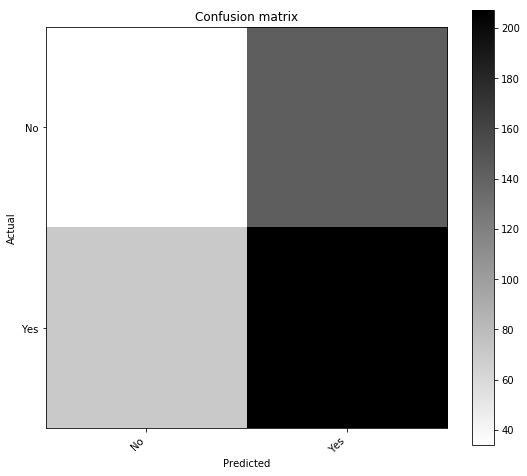

In [14]:
# Matplot lib for binary confusion matrix
confusion_matrix.plot()
plt.show()

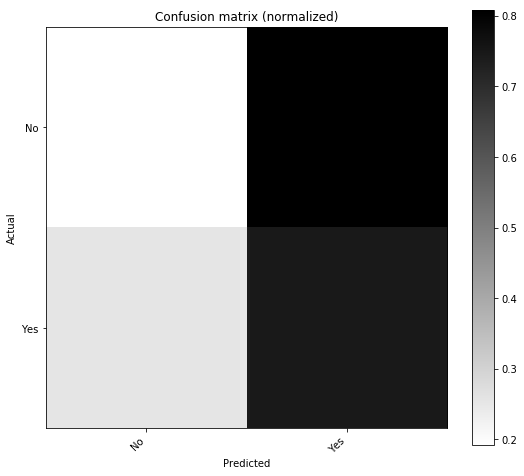

In [15]:
# Matplotlib for normalized confusion matrix
confusion_matrix.plot(normalized=True)
plt.show()